## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df=pd.merge(mouse_metadata,study_results, on="Mouse ID" )
# Display the data table for preview
mouse_results_df.sample(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
154,c758,Ramicane,Male,9,17,45,33.397653,1
1727,w697,Stelasyn,Female,14,30,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
563,a818,Naftisol,Female,12,28,25,56.966273,0
1632,v719,Infubinol,Female,17,30,20,54.048608,1
206,a520,Ramicane,Male,13,21,5,38.723707,0
1686,w350,Propriva,Male,7,26,10,48.899552,0
1025,k210,Ceftamin,Male,15,28,5,47.918998,0
1689,w350,Propriva,Male,7,26,25,52.805915,1


In [2]:
# Checking the number of mice.
mice_number=mouse_results_df["Mouse ID"].nunique()
mice_number_count=mouse_results_df["Mouse ID"].count()

print(mice_number_count) #total count of all rows
print(mice_number) #total count of all uniques values for Mouse ID
mice_df=pd.DataFrame({'Number of mice':[mice_number]})
mice_df

1893
249


,Number of mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID_df=mouse_results_df.copy()
duplicate=duplicate_mouseID_df[['Mouse ID','Timepoint']][duplicate_mouseID_df.duplicated(['Mouse ID','Timepoint'])]
duplicate.head(25)

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all=duplicate_mouseID_df[duplicate_mouseID_df.duplicated('Mouse ID')]
duplicate_all


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
drop_duplicate_all=mouse_results_df.copy()
drop_duplicate_all.drop_duplicates(subset=(["Mouse ID","Timepoint"]), keep='first', inplace=True)# )
drop_duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number_count2=drop_duplicate_all["Mouse ID"].count()
mice_number_count2

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

volume=drop_duplicate_all.copy().groupby(["Drug Regimen"])

tumor_volume_mean=volume["Tumor Volume (mm3)"].mean() 
tumor_volume_median=volume["Tumor Volume (mm3)"].median()
tumor_volume_var=volume["Tumor Volume (mm3)"].var()
tumor_volume_std=volume["Tumor Volume (mm3)"].std()
tumor_volume_sem=volume["Tumor Volume (mm3)"].sem()

tumor_volume_df=pd.DataFrame({'mean':tumor_volume_mean,
                              'median':tumor_volume_median,
                              'variance':tumor_volume_var,
                              'Stanar deviation':tumor_volume_std, 'SEM':tumor_volume_sem})
tumor_volume_df


,mean,median,variance,Stanar deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
volume_new=drop_duplicate_all.copy().groupby(["Drug Regimen"]) 
function_list=['mean','median','var', 'std', 'sem'] #this list will will performe each operation.
volume_new_df=volume_new["Tumor Volume (mm3)"].agg(function_list)
volume_new_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

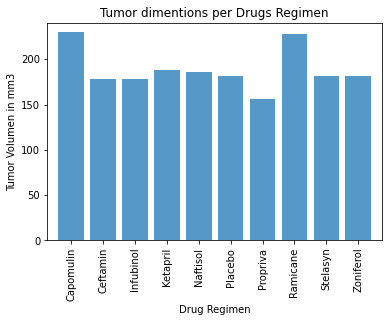

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#new data frame is in ordered with the arrange columns as needed.
bar_pd=drop_duplicate_all.copy().groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
bar_pd_df=pd.DataFrame(bar_pd)
bar_pd_df

bar_rs=bar_pd_df.reset_index()
bar_rs

x_axis=np.arange(len(bar_pd_df))
plt.bar(x_axis, bar_pd_df['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(x_axis,bar_rs["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(bar_pd_df['Tumor Volume (mm3)'])+10)
plt.title("Tumor dimentions per Drugs Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volumen in mm3")
plt.savefig('Charts/barPlotPandas')

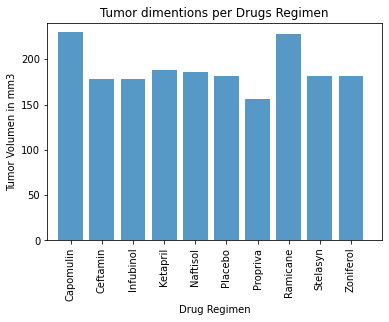

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis=np.arange(len(bar_pd_df))#using the same data frame from the pandas metho

tick_location=[x for x in x_axis]

barr3=bar_pd_df.reset_index()
barr3
#plt.figure(figsize=(30,5)) 
plt.bar(x_axis, bar_pd_df["Tumor Volume (mm3)"], alpha=0.75, align="center")
plt.xticks(tick_location, barr3["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(bar_pd_df["Tumor Volume (mm3)"])+10)
plt.title("Tumor dimentions per Drugs Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volumen in mm3")
plt.savefig('Charts/barPlotPyplot')
plt.show()

In [11]:
pie_pd=drop_duplicate_all.copy().groupby("Sex").nunique()["Mouse ID"]
pie_pd_df=pd.DataFrame(pie_pd)
pie_pd_df


,Mouse ID
Sex,
Female,124
Male,125


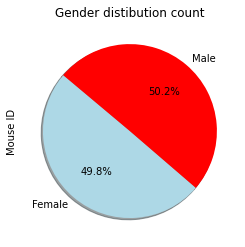

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=["lightblue","red"]
pie_pd_df["Mouse ID"].plot(y=' ', kind= 'pie', shadow=True, startangle=140, autopct="%1.1f%%", colors=colors)
plt.title('Gender distibution count')
plt.savefig('Charts/pieChartPandas')

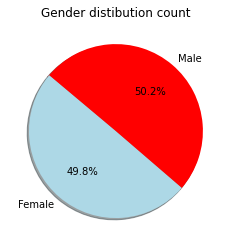

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#the new data frame needed for the pie charts reflecting only the unique number of individual mice that participated.
sizes=pie_pd_df["Mouse ID"]
labels=pie_pd_df.index.values.tolist()
colors=["lightblue","red"]
plt.pie(sizes, labels=labels,autopct="%1.1f%%",colors=colors,shadow=True, startangle=140)
plt.title('Gender distibution count')
plt.savefig('Charts/pieChartPylot')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
